# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test.shape

(10000, 784)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

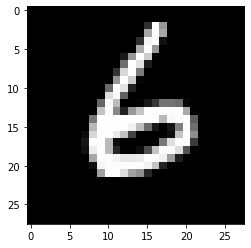

In [11]:
plt.imshow(X_train[3,:].reshape((28,28)), cmap="gray")

In [12]:
y_train[3]

'6'

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

### Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
clfNB = GaussianNB()
clfNB.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred_NB = clfNB.predict(X_train)

In [17]:
accuracy_score(y_train, y_pred_NB)

0.5607666666666666

In [18]:
confusion_matrix(y_train, y_pred_NB)

array([[5211,   10,   39,   14,   11,   12,  220,    5,  280,  138],
       [   2, 6369,   18,   24,    3,   10,   81,    2,  169,   81],
       [ 431,  164, 2007,  301,   28,   18, 1529,   21, 1401,   96],
       [ 301,  298,   58, 2030,   13,   11,  371,   60, 2230,  719],
       [ 110,   35,   51,   27, 1032,   29,  536,   38, 1144, 2838],
       [ 524,  135,   39,  114,   44,  255,  320,   11, 3350,  611],
       [  43,   92,   29,    1,    5,   18, 5545,    0,  125,    8],
       [  21,   45,   10,   44,   50,    6,   18, 1966,  179, 3949],
       [  83,  721,   32,   38,   25,   30,  101,    9, 3556, 1231],
       [  29,   31,   17,   11,   33,    4,    5,   83,  103, 5675]],
      dtype=int64)

### Simple linear model

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
clfLM = make_pipeline(StandardScaler(),SGDClassifier(max_iter=10, tol=1e-3, loss="log"))

In [21]:
clfLM.fit(X_train, y_train)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log', max_iter=10))])

In [22]:
y_pred_LM = clfLM.predict(X_train)

In [23]:
accuracy_score(y_train, y_pred_LM)

0.9176666666666666

In [25]:
confusion_matrix(y_train, y_pred_LM)

array([[5762,    2,   19,   12,   10,   41,   40,    9,   41,    4],
       [   0, 6523,   39,   19,    5,   40,   11,    8,   99,   15],
       [  43,   31, 5393,   93,   82,   24,   81,   57,  175,   17],
       [  37,   29,  122, 5375,    3,  204,   33,   51,  138,   99],
       [  15,   24,   33,    7, 5369,    9,   48,   26,   82,  227],
       [  61,   37,   26,  185,   66, 4617,  114,   32,  175,   90],
       [  27,   19,   40,    3,   32,   93, 5597,    9,   45,    1],
       [  22,   21,   64,   26,   41,   10,    7, 5864,   14,  219],
       [  41,  118,   59,  124,   14,  140,   51,   22, 5120,  137],
       [  37,   29,   18,   85,  125,   32,    2,  140,   83, 5440]],
      dtype=int64)

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [27]:
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clfRF = RandomForestClassifier(max_depth=40, random_state=0)
clfRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, random_state=0)

In [28]:
y_pred_RF = clfRF.predict(X_train)

In [29]:
accuracy_score(y_train, y_pred_RF)

1.0

In [30]:
confusion_matrix(y_train, y_pred_RF)

array([[5940,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6759,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5996,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6091,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5840,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5403,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5866,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6288,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5826,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5991]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [31]:
from sklearn.metrics import f1_score
from sklearn import metrics

### Accurancy

In [34]:
#Navie Bayes
y_pred_NB_test = clfNB.predict(X_test)
accuracyNB = accuracy_score(y_test, y_pred_NB_test)
print("Naive-Bayes-train-acc:",accuracyNB)

Naive-Bayes-train-acc: 0.5591


In [35]:
#Simple linear model
y_pred_LM_test = clfLM.predict(X_test)
accuracyLM = accuracy_score(y_test, y_pred_LM_test)
print("Simple-Linear-model-train-acc:",accuracyLM)

Simple-Linear-model-train-acc: 0.9162


In [36]:
#Random Forest
y_pred_RF_test = clfRF.predict(X_test)
accuracyRF = accuracy_score(y_test, y_pred_RF_test)
print("Random-Forest-train-acc:",accuracyRF)

Random-Forest-train-acc: 0.9708


### F-Measure

In [37]:
#Navie Bayes
fMeasureNB = f1_score(y_test, y_pred_NB_test, average='macro')
print("Naive-Bayes-train-f1:",fMeasureNB)

Naive-Bayes-train-f1: 0.5166266650491791


In [39]:
#Simple linear model
fMeasureLM = f1_score(y_test, y_pred_LM_test, average='macro')
print("Simple-Linear-model-train-f1:",fMeasureLM)

Simple-Linear-model-train-f1: 0.9153517976055671


In [40]:
#Random Forest
fMeasureRF = f1_score(y_test, y_pred_RF_test, average='macro')
print("Random-Forest-train-f1:",fMeasureRF)

Random-Forest-train-f1: 0.9705393415153394


### ROC curves

In [163]:
from sklearn.metrics import auc, roc_auc_score,  roc_curve

In [165]:
y5 = y_test=='5'
clfNB5 = clfNB.predict(X_test).astype(int)==5
clfLM5 = clfLM.predict(X_test).astype(int)==5
clfRF5= clfRF.predict(X_test).astype(int)==5

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y5, clfNB5)
rocauc_NB = auc(fpr_NB, tpr_NB)

fpr_LM, tpr_LM, thresholds_LM = roc_curve(y5, clfLM5)
rocauc_LM = auc(fpr_LM, tpr_LM)

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y5, clfRF5)
rocauc_RF = auc(fpr_RF, tpr_RF)

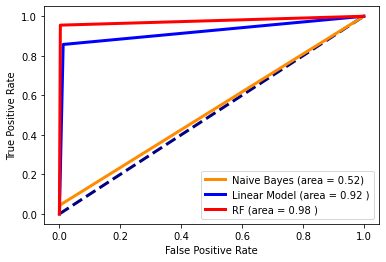

In [168]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.plot(fpr_NB, tpr_NB, color='darkorange',
         lw=3, label='Naive Bayes (area = %s)' % round(rocauc_NB, 2))
plt.plot(fpr_LM, tpr_LM, color='blue',
         lw=3, label='Linear Model (area = %s )' % round(rocauc_LM, 2))
plt.plot(fpr_RF, tpr_RF, color='red',
         lw=3, label='RF (area = %s )' % round(rocauc_RF, 2))
plt.legend()
plt.show()